In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**IMPORT DATASET**

In [13]:
df = pd.read_excel('D:\Corizo\Minor Project-20240312T063352Z-001\Minor Project\Minor Project Data set (Stock Price Prediction).xlsx')

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [15]:
df.shape

(1009, 7)

In [16]:
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [17]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [18]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


In [20]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [44]:
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,day,month,Year,Day,Month
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,5,2,2018,5,2
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,6,2,2018,6,2
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,7,2,2018,7,2
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,8,2,2018,8,2
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,9,2,2018,9,2


In [45]:
#date dropped
df.drop('Date', axis=1, inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,day,month,Year,Day,Month
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,5,2,2018,5,2
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,6,2,2018,6,2
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,7,2,2018,7,2
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,8,2,2018,8,2
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,9,2,2018,9,2


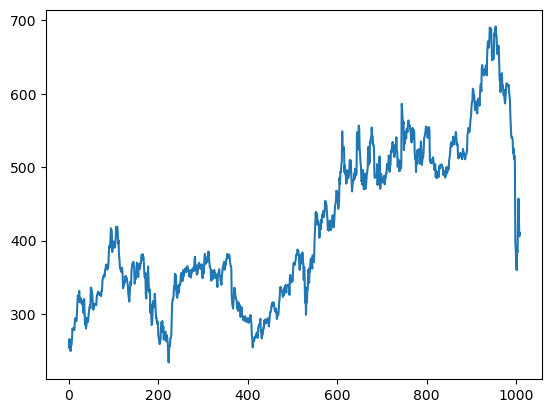

In [94]:
plt.plot(df.Close)

In [47]:
df

,Open,High,Low,Close,Adj Close,Volume,year,day,month,Year,Day,Month
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,5,2,2018,5,2
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,6,2,2018,6,2
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,7,2,2018,7,2
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,8,2,2018,8,2
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,9,2,2018,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022,31,1,2022,31,1
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022,1,2,2022,1,2
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022,2,2,2022,2,2
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,2022,3,2,2022,3,2


**Classification Problem:Buy(+1) or sell(-1) the stock**

In [16]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df = df.dropna()

**Input Features to predict whether customer should buy or sell the stock**

In [22]:
X = df[['Open - Close','High - Low']]
X.head()

,Open - Close,High - Low
0,7.740005,17.869995
1,-18.020004,21.700012
2,2.019989,8.120025
3,16.979981,17.619995
4,4.380005,19.690002


**Intention to store +1 for the buy signal and -1 for the sell signal.The target variable is "Y" for classification task**

In [19]:
Y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [20]:
Y

array([ 1, -1, -1, ..., -1,  1, -1])

In [95]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    600.807798
1005    599.403698
1006    597.711299
1007    595.874399
1008    594.198499
Name: Close, Length: 1009, dtype: float64

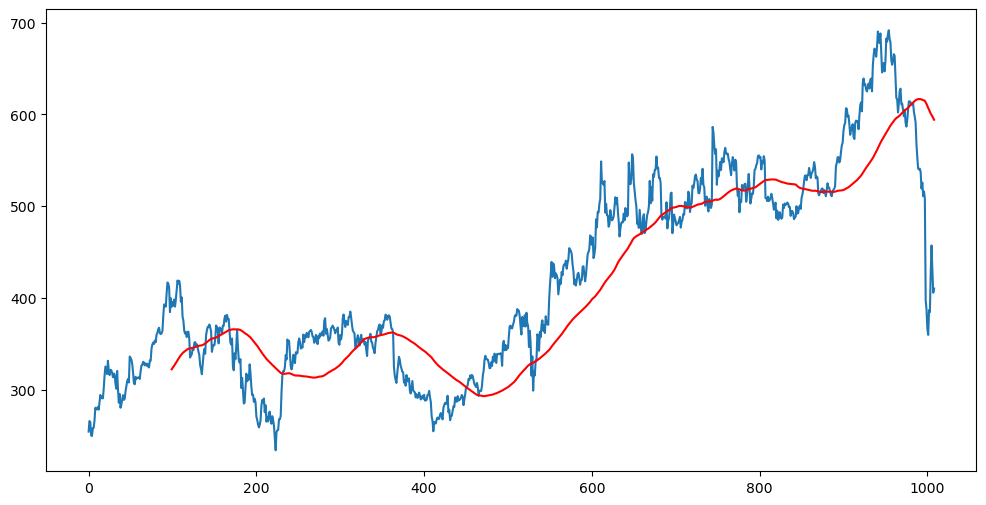

In [96]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [97]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    560.237698
1005    559.751148
1006    559.150698
1007    558.634198
1008    558.141148
Name: Close, Length: 1009, dtype: float64

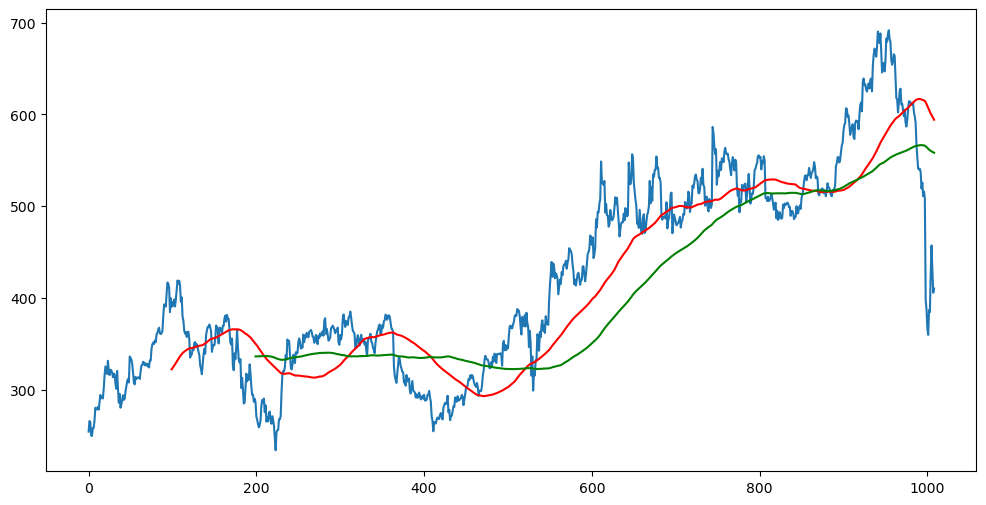

In [107]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [102]:
#Splittig Data Training & Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.75)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.75) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(756, 1)
(253, 1)


In [105]:
data_training.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [106]:
#next 30percent data
data_testing.head()

,Close
756,550.789978
757,547.919983
758,559.070007
759,563.590027
760,557.590027


In [126]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05782213],
       [0.09033648],
       [0.08704531],
       [0.04601941],
       [0.04423196],
       [0.06829145],
       [0.06919929],
       [0.09113089],
       [0.13161772],
       [0.12665262],
       [0.12673773],
       [0.13380242],
       [0.12557455],
       [0.14767629],
       [0.17102649],
       [0.16095437],
       [0.16313907],
       [0.16033027],
       [0.19057476],
       [0.23015375],
       [0.25914995],
       [0.24763092],
       [0.23582815],
       [0.27679734],
       [0.24802808],
       [0.2326505 ],
       [0.24873738],
       [0.24743229],
       [0.23994213],
       [0.22584123],
       [0.23724675],
       [0.23435284],
       [0.20660501],
       [0.1902627 ],
       [0.24533279],
       [0.1895534 ],
       [0.14722233],
       [0.17440276],
       [0.13167452],
       [0.14126427],
       [0.15621629],
       [0.17048741],
       [0.15596095],
       [0.15902509],
       [0.18211995],
       [0.19800829],
       [0.21383984],
       [0.220

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 44)

In [25]:
from sklearn .neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

#fit the model
model.fit(x_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.75
Test_data Accuracy: 0.43


In [30]:
predictions_classification = model.predict(x_test)

In [31]:
actual_predicted_data = pd.DataFrame({'Actual Class':y_test, 'Predicted Class':predictions_classification})

In [47]:
actual_predicted_data.head(100)

,Actual Class,Predicted Class
0,1,-1
1,1,1
2,-1,1
3,1,-1
4,1,-1
...,...,...
95,1,-1
96,1,-1
97,1,-1
98,1,-1


**Regression problem:KNN**

In [26]:
y = df['Close']

In [27]:
y

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

**Implementation of KNN Regression**

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25, random_state=44)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model
model_reg.fit(x_train_reg, y_train_reg)
predictions = model_reg.predict(x_test_reg)

In [42]:
print(predictions)

[397.6246664  378.18466587 510.465334   440.1599956  417.35733233
 375.96932993 405.3619996  336.4799988  463.25799967 358.091333
 463.44599507 412.254004   444.0613302  447.04800013 367.77533373
 354.60200187 413.0373332  342.8706624  444.3699992  449.78866387
 459.14466347 426.66199953 399.32666833 410.98866353 453.1899964
 403.10133267 412.55199987 442.6719992  477.4953338  361.86199953
 359.217334   377.49199627 365.67466433 405.51666667 407.499998
 338.37333167 400.98132933 457.19066567 356.34066373 428.8886698
 419.53600053 454.83333533 498.04665947 364.13400067 420.0513306
 427.7600026  428.92199707 351.98999633 466.9533326  347.55599767
 410.38733107 429.15466713 398.017336   404.92000133 509.136676
 436.32399913 453.034672   365.57333373 420.37866607 436.66199533
 457.34533087 465.58733927 346.98266807 344.43800253 435.74666747
 373.0373312  498.12866607 412.0466614  398.80666507 444.12732953
 417.4373332  410.3640024  365.476001   366.093335   440.8186666
 423.9006632  490.19

In [43]:
#rmse
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

422.1124703408482

In [44]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})

In [46]:
valid.head(100)

,Actual Close,Predicted Close value
390,291.440002,397.624666
414,263.079987,378.184666
724,534.450012,510.465334
19,315.000000,440.159996
496,342.880005,417.357332
...,...,...
688,486.239990,484.000008
880,517.349976,354.348663
255,345.730011,399.326668
125,343.089996,403.275340
